In [7]:
import sys
import os
import numpy as np
import cv2
sys.path.append("./utils/") # Adds higher directory to python modules path.
import loadcoraldata_utils as coralutils
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
from NeMO_losses import charbonnierLoss
import NeMO_layers
from keras.models import Model, Sequential, load_model
from scipy.misc import imresize
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from metrics import metrics
import json

import tensorflow as tf
from tensorflow.python.client import device_lib
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

%matplotlib notebook

In [19]:
img = coralutils.CoralData("/home/shared/NeMO-Net Data/Planet/Peros Banhos/20181025_050344_1001/20181025_050344_1001_3B_AnalyticMS_SR.tif", load_type="raster")
jsonpath = "/home/shared/NeMO-Net Data/Planet/Peros Banhos/20181025_050344_1001/20181025_050344_1001_metadata.json"
with open(jsonpath) as json_file:
    json_data = json.load(json_file)
    

(4377, 8871, 4)
6183.0
{'_links': {'_self': 'https://api.planet.com/data/v1/item-types/PSScene4Band/items/20181025_050344_1001', 'assets': 'https://api.planet.com/data/v1/item-types/PSScene4Band/items/20181025_050344_1001/assets/', 'thumbnail': 'https://tiles.planet.com/data/v1/item-types/PSScene4Band/items/20181025_050344_1001/thumb'}, '_permissions': ['assets.basic_analytic_rpc_nitf:download', 'assets.udm2:download', 'assets.analytic_xml:download', 'assets.basic_analytic_dn:download', 'assets.basic_analytic_dn_xml_nitf:download', 'assets.basic_analytic_dn_nitf:download', 'assets.basic_analytic_xml:download', 'assets.basic_analytic_nitf:download', 'assets.basic_analytic_rpc:download', 'assets.analytic_dn:download', 'assets.basic_udm:download', 'assets.basic_analytic_dn_rpc_nitf:download', 'assets.analytic:download', 'assets.analytic_dn_xml:download', 'assets.analytic_sr:download', 'assets.basic_analytic_dn_xml:download', 'assets.basic_udm2:download', 'assets.basic_analytic_dn_rpc:down

<IPython.core.display.Javascript object>


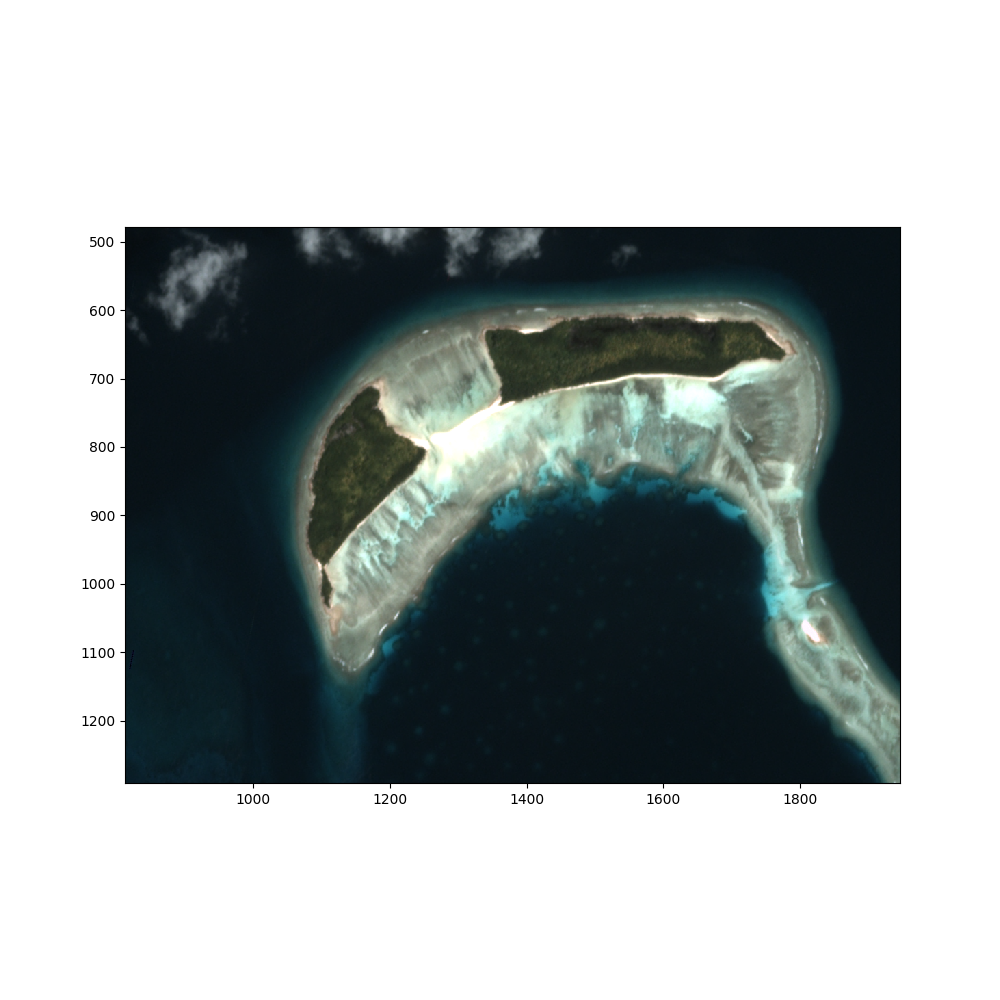

In [26]:
print(img.image.shape)
print(np.max(img.image))
print(json_data)

def fixRGBimg(img,pixel_mean,pixel_std,minval,maxval):
    fixed_img = img
    fixed_img = fixed_img*pixel_std+pixel_mean
    fixed_img[fixed_img > maxval] = maxval
    fixed_img[fixed_img < minval] = minval
    fixed_img = np.asarray(fixed_img, dtype=np.uint8)
    return fixed_img

fixed_img = fixRGBimg(img.image,0,255/3000,0,255)

fig = plt.figure(1, figsize=(10,10))
pic = np.rollaxis(np.asarray([fixed_img[:,:,2], fixed_img[:,:,1], fixed_img[:,:,0]]),0,3)
pic = np.asarray(pic, dtype=np.uint8)
plt.imshow(pic)
plt.show()
